In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Read the dataframe and check for null values, duplicates
df = pd.read_csv('/content/spotify.csv')

# Check for null values and handle them
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)


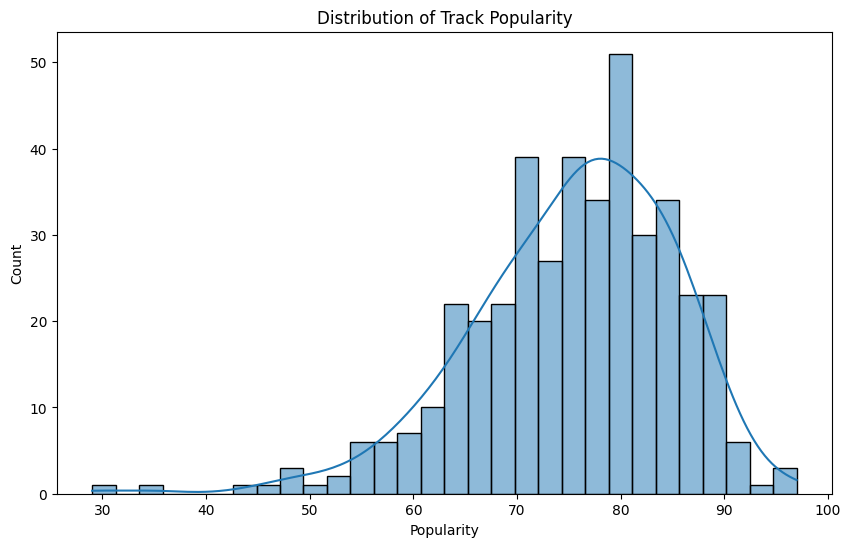

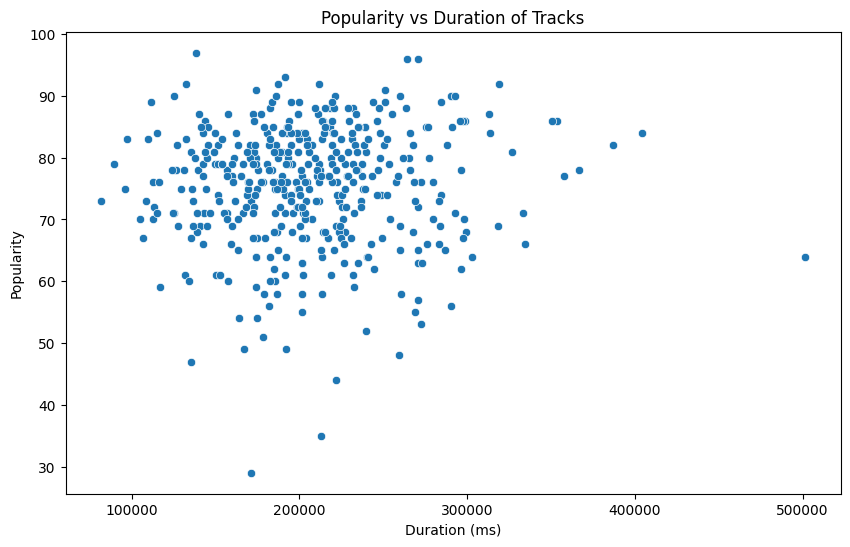

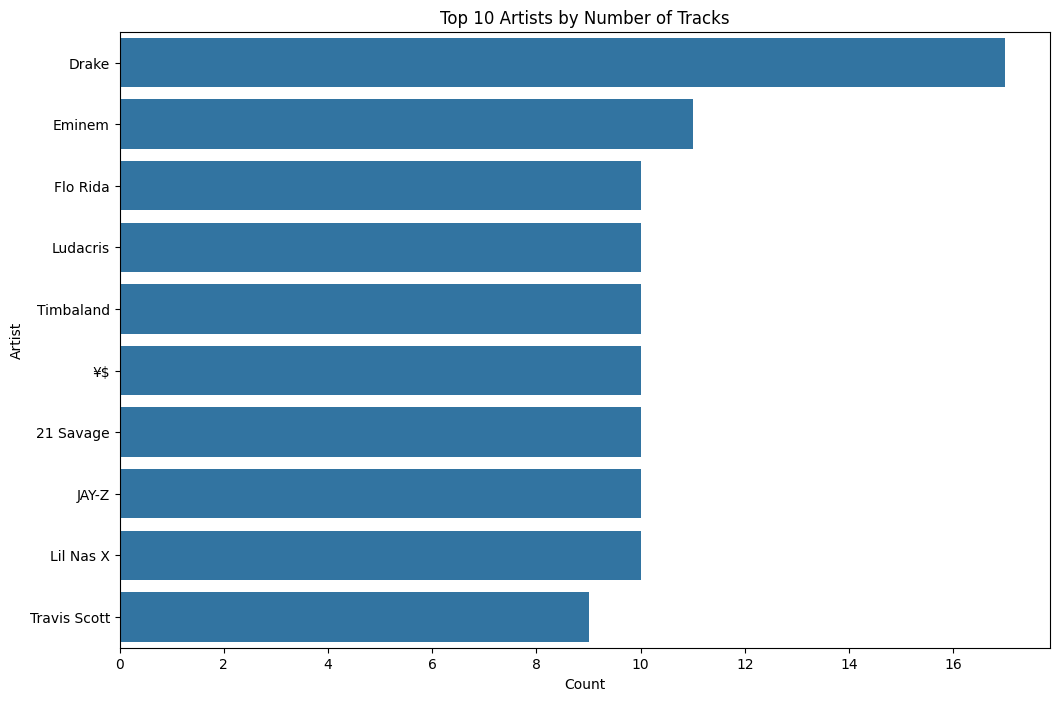

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48
Top 5 Artists by Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64
Most Popular Tracks of Top 5 Artists:
                     Artist  \
369                  *NSYNC   
345                2 Chainz   
70                21 Savage   
391  A Boogie Wit da Hoodie   
437               A$AP Ferg   
..                      ...   
156              Young Nudy   
174              Young Thug   
167            benny blanco   
140                   cassö   
260     

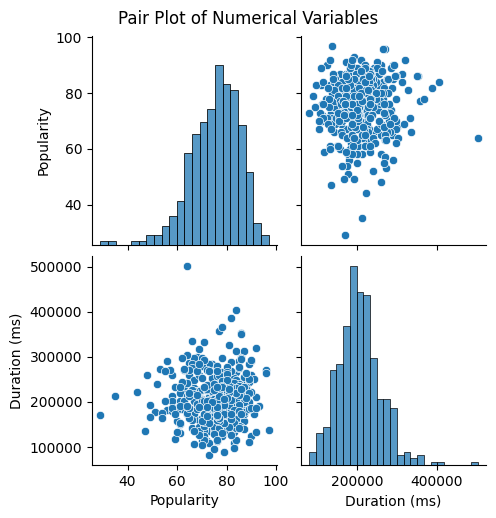

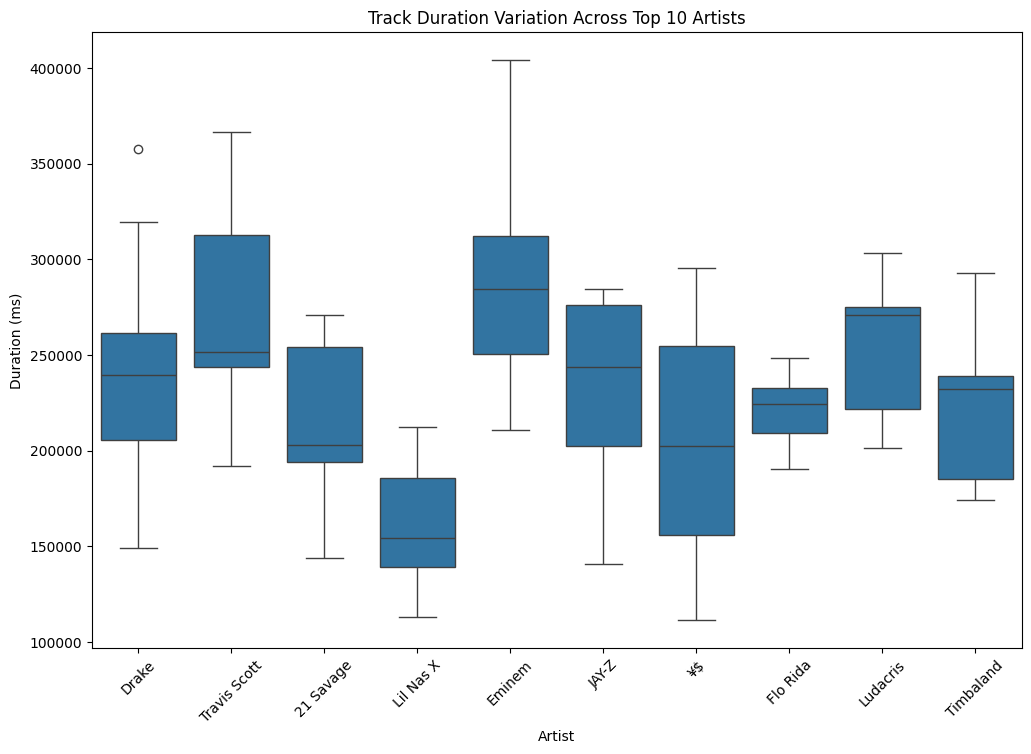

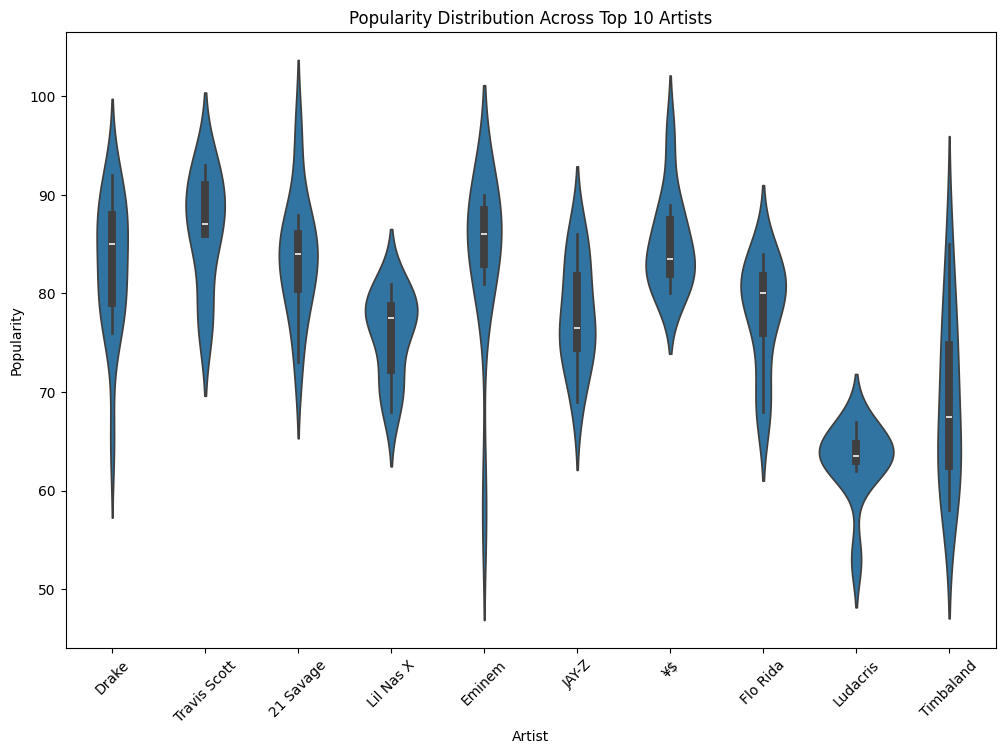

In [4]:
# 2. Distribution of track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# 3. Relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# 4. Artist with the highest number of tracks
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', order=df['Artist'].value_counts().index[:10], data=df)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

# 5. Top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

# 6. Top 5 artists by average popularity
top_5_artists_avg = df.groupby('Artist')['Popularity'].mean().nlargest(5)
print("Top 5 Artists by Average Popularity:")
print(top_5_artists_avg)

# 7. Most popular track for each of the top 5 artists
most_popular_tracks = df.loc[df.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]
print("Most Popular Tracks of Top 5 Artists:")
print(most_popular_tracks)

# 8. Pair plot of numerical variables
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# 9. Box plot of track duration across artists
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(df['Artist'].value_counts().index[:10])])
plt.xticks(rotation=45)
plt.title('Track Duration Variation Across Top 10 Artists')
plt.show()

# 10. Violin plot of popularity distribution by artist
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(df['Artist'].value_counts().index[:10])])
plt.xticks(rotation=45)
plt.title('Popularity Distribution Across Top 10 Artists')
plt.show()
